<a href="https://colab.research.google.com/github/chiusanghung/Traffic-Sign-Recognition/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive',force_remount=True)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_AI/Train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset_AI/Test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 2651 images belonging to 43 classes.
Found 138 images belonging to 43 classes.


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(64,64,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(43,activation='softmax'))

model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        36928     
                                                      

In [7]:
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])

In [8]:
# Training 
history = model.fit_generator( train, validation_data=test, epochs=80, steps_per_epoch=len(train), 
                        validation_steps=len(test))



<ipython-input-8-3f57a21db6d6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator( train, validation_data=test, epochs=80, steps_per_epoch=len(train),


Epoch 1/80
83/83 [==============================] - 946s 11s/step - loss: 3.7805 - accuracy: 0.0309 - val_loss: 3.7048 - val_accuracy: 0.0435
Epoch 2/80
83/83 [==============================] - 10s 124ms/step - loss: 3.4144 - accuracy: 0.1011 - val_loss: 3.2852 - val_accuracy: 0.1304
Epoch 3/80
83/83 [==============================] - 9s 112ms/step - loss: 2.6014 - accuracy: 0.2795 - val_loss: 2.1081 - val_accuracy: 0.4203
Epoch 4/80
83/83 [==============================] - 10s 124ms/step - loss: 1.3662 - accuracy: 0.5730 - val_loss: 1.1794 - val_accuracy: 0.6957
Epoch 5/80
83/83 [==============================] - 10s 124ms/step - loss: 0.8198 - accuracy: 0.7280 - val_loss: 1.2689 - val_accuracy: 0.7101
Epoch 6/80
83/83 [==============================] - 9s 113ms/step - loss: 0.5277 - accuracy: 0.8178 - val_loss: 1.0541 - val_accuracy: 0.7246
Epoch 7/80
83/83 [==============================] - 11s 127ms/step - loss: 0.4247 - accuracy: 0.8518 - val_loss: 1.0697 - val_accuracy: 0.7826
Ep

In [9]:
#Tạo file inception
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset_AI/model.h5')

In [10]:
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/Dataset_AI/model.h5')
model

Test loss=  0.9331092238426208
Test accuracy=  0.8405796885490417


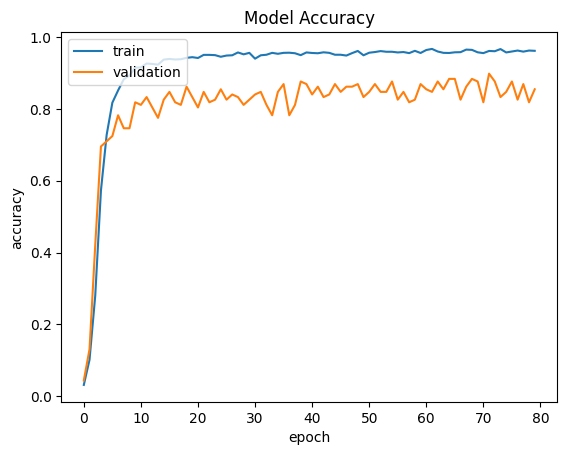

In [11]:
import matplotlib.pyplot as plt
score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

In [14]:

import pandas as pd
clases = pd.read_csv('/content/drive/MyDrive/Dataset_AI/class.csv')
clases = list(clases)
clases

['Duong Cam',
 'Cam Di Nguoc Chieu',
 'Cam O To',
 ' Cam O To Re Phai',
 'Cam O To Re Trai',
 'Cam Xe May',
 'Cam O To Va Xe May',
 'Cam Xe Tai',
 'Cam Xe Tai Tren 2.5 tan',
 ' Cam O To Khach Va O To',
 'Cam O To Ro-Mooc',
 'Cam May Keo',
 'Cam Xe Dap',
 'Cam Xe Dap Tho',
 'Cam Xe 3 va 4 Banh Tho So',
 'Cam Nguoi Di Bo',
 'Cam Xe Keo Day',
 'Cam Xe Suc Vat Keo',
 'Han Che Trong Luong Xe',
 'Han Che Trong Luong Truc Xe',
 'Han Che Chieu Cao Xe',
 'Han Che Chieu Rong Xe',
 'Han Che Chieu Dai O To',
 'Han Che Chieu Dai Ro-Mooc',
 'Khoang Cach Toi Thieu Giua Hai Xe',
 'Dung Lai',
 'Cam Re Trai',
 'Cam Re phai',
 'Cam Quay Dau',
 'Cam O To Quay Dau',
 'Cam Vuot',
 'Cam O To Vuot',
 'Toc Do Toi Da',
 'Cam Bop Coi',
 'Tram Thue Quan',
 'Cam Dung Va Do Xe',
 ' Cam Do Xe',
 'Cam Do Xe Ngay Le',
 ' Cam Do Xe Ngay Chan',
 'Nhuong Duong Cho Xe Co Gioi Di Nguoc Chieu Trong Duong Hep',
 'Het Cam Vuot',
 'Het Han Che Toi Da',
 'Het Tat Ca Cac Lenh Cam']

1/1 [==============================] - 0s 20ms/step
Cam O To


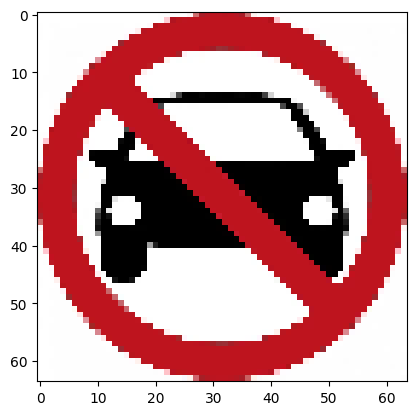

In [17]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt
img = load_img('/content/drive/MyDrive/Dataset_AI/Value/3.jpg', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 70ms/step
 Cam O To Re Phai


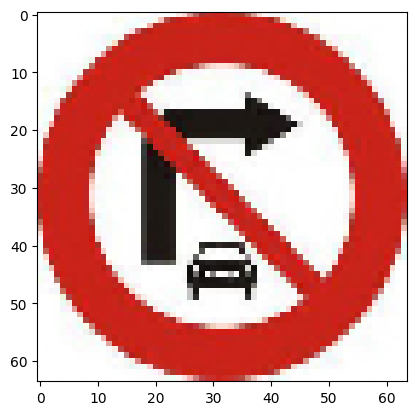

In [18]:
img = load_img('/content/drive/MyDrive/Dataset_AI/Value/4.jpg', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 22ms/step
Cam Xe May


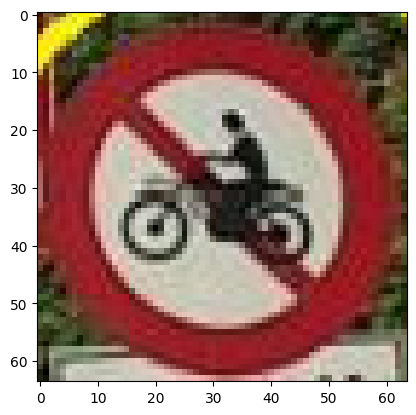

In [19]:
img = load_img('/content/drive/MyDrive/Dataset_AI/Value/6.JPG', target_size = (64,64))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,64,64,3) 
img = img.astype('float32')
img = img/255
print(clases[np.argmax(model.predict(img))])